#Modelado

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


: 

#*Cargar dataset*

In [ ]:
DATA = "./datasets/df_model.csv"

In [35]:
df_model = pd.read_csv(DATA)

In [36]:
df_model.sample(10)

,SCHEDULED_DEPARTURE_HOUR,IS_RUSH_HOUR,IS_WEEKEND,IS_COMPLEX_FLIGHT,IS_NIGHT_FLIGHT,is_high_traffic_route,DEPARTURE_TIME_BLOCK_mañana,DEPARTURE_TIME_BLOCK_tarde,DEPARTURE_TIME_BLOCK_noche,SEASON_primavera,SEASON_verano,DISTANCE_CATEGORY_larga,DISTANCE_CATEGORY_media,DURATION_CATEGORY_larga,DURATION_CATEGORY_media,TARGET_DELAY_15
3621528,19,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4280032,6,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1
1348395,10,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
265539,18,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1946581,15,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
4253648,12,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
4239618,11,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
4618930,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1786658,17,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0
732036,17,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1


In [37]:
df_model.columns

Index(['SCHEDULED_DEPARTURE_HOUR', 'IS_RUSH_HOUR', 'IS_WEEKEND',
       'IS_COMPLEX_FLIGHT', 'IS_NIGHT_FLIGHT', 'is_high_traffic_route',
       'DEPARTURE_TIME_BLOCK_mañana', 'DEPARTURE_TIME_BLOCK_tarde',
       'DEPARTURE_TIME_BLOCK_noche', 'SEASON_primavera', 'SEASON_verano',
       'DISTANCE_CATEGORY_larga', 'DISTANCE_CATEGORY_media',
       'DURATION_CATEGORY_larga', 'DURATION_CATEGORY_media',
       'TARGET_DELAY_15'],
      dtype='object')

In [38]:
df_model.shape

(5729195, 16)

#*Identificar columnas para el escalado*

In [39]:
# opcion de escalado

numeric_features = ['SCHEDULED_DEPARTURE_HOUR']

binary_and_encoded_features = [
    'IS_RUSH_HOUR', 'IS_WEEKEND', 'IS_COMPLEX_FLIGHT',
    'IS_NIGHT_FLIGHT', 'is_high_traffic_route',
    'DEPARTURE_TIME_BLOCK_mañana', 'DEPARTURE_TIME_BLOCK_tarde',
    'DEPARTURE_TIME_BLOCK_noche',
    'SEASON_primavera', 'SEASON_verano',
    'DISTANCE_CATEGORY_larga', 'DISTANCE_CATEGORY_media',
    'DURATION_CATEGORY_larga', 'DURATION_CATEGORY_media'
]


#*Preprocesador (ColumnTransformer)*

In [40]:
#opcion de escalado

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', binary_and_encoded_features)
    ]
)


In [41]:
df_model['TARGET_DELAY_15'].isna().sum()


np.int64(0)

In [42]:
# Eliminar filas con NaN en la variable objetivo
df_model = df_model.dropna(subset=['TARGET_DELAY_15'])

# Verificación
print(df_model['TARGET_DELAY_15'].isna().sum())


0


#*División en Train y Test*



In [43]:
# Variables predictoras y objetivo
X = df_model.drop(columns=['TARGET_DELAY_15'])
y = df_model['TARGET_DELAY_15']

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Verificación
print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (4583356, 15)
Test: (1145839, 15)


In [44]:
print("Tamaño X_train:", X_train.shape)
print("\nTamaño X_test:", X_test.shape)

print("Distribución de clases en y_train:")

print(y_train.value_counts(normalize=True))

print("Distribución de clases en y_test:")

print(y_test.value_counts(normalize=True))


Tamaño X_train: (4583356, 15)

Tamaño X_test: (1145839, 15)
Distribución de clases en y_train:
TARGET_DELAY_15
0    0.821354
1    0.178646
Name: proportion, dtype: float64
Distribución de clases en y_test:
TARGET_DELAY_15
0    0.821354
1    0.178646
Name: proportion, dtype: float64


#Generación del modelo Decision Tree

In [45]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(
        criterion='gini',
        max_depth=6,
        random_state=42


    ))
])



#*Entrenamiento del modelo y tiempo de ejecución*

In [46]:
start_time = time.time()

pipeline_dt.fit(X_train, y_train)


end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")


Tiempo de entrenamiento: 21.2303 segundos


#*Predicción sobre el conjunto test*

In [47]:
# Seleccionar una muestra del conjunto test
sample = X_test.iloc[[0]]

# Predicción de clase
prediction = pipeline_dt.predict(sample)

print("Predicción:", prediction[0])


Predicción: 0


#*Probabilidades de la predicción*

In [48]:
# Probabilidades de predicción
probabilities = pipeline_dt.predict_proba(sample)

print("Probabilidad sin retraso (0):", probabilities[0][0])
print("Probabilidad con retraso (1):", probabilities[0][1])


Probabilidad sin retraso (0): 0.8357870091170315
Probabilidad con retraso (1): 0.16421299088296853


In [49]:
pipeline_dt.predict_proba(sample)


array([[0.83578701, 0.16421299]])

#*Guardar el modelo Decision Tree entrenado*

In [50]:
import joblib
joblib.dump(pipeline_dt, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [51]:
import os

os.path.exists('decision_tree_model.pkl')


True

In [52]:
pipeline_dt_loaded = joblib.load('decision_tree_model.pkl')


In [53]:
prediction = pipeline_dt_loaded.predict(sample)
probabilities = pipeline_dt_loaded.predict_proba(sample)

print("Predicción:", prediction[0])
print("Probabilidades:", probabilities)


Predicción: 0
Probabilidades: [[0.83578701 0.16421299]]


#*Generación del modelo RandomForest*

In [54]:
# Pipeline con normalización + Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42,
        n_jobs=-1
    ))
])

#*Entrenamiento del modelo, parametros y tiempo de ejecución*

In [55]:
start_time = time.time()
pipeline_rf.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")


Tiempo de entrenamiento: 718.8754 segundos


#*Predicción sobre el conjunto test*

In [56]:
# Seleccionar una muestra del conjunto test
sample = X_test.iloc[[0]]

# Predicción de clase
prediction = pipeline_rf.predict(sample)

print("Predicción:", prediction[0])


Predicción: 0


#*Probabilidades de la predicción*

In [57]:
# Probabilidades de predicción
proba = pipeline_rf.predict_proba(sample)

print("Probabilidad No Retraso (0):", proba[0][0])
print("Probabilidad Retraso (1):", proba[0][1])


Probabilidad No Retraso (0): 0.8339017967938809
Probabilidad Retraso (1): 0.1660982032061191


In [58]:
pipeline_rf.predict_proba(sample)

array([[0.8339018, 0.1660982]])

In [59]:
joblib.dump(pipeline_dt, 'randomforest_model.pkl')

['randomforest_model.pkl']

In [60]:
os.path.exists('decision_tree_model.pkl')

True

In [61]:
prediction = pipeline_rf.predict(sample)
probabilities = pipeline_rf.predict_proba(sample)

print("Predicción:", prediction[0])
print("Probabilidades:", probabilities)


Predicción: 0
Probabilidades: [[0.8339018 0.1660982]]


#*Creación de matriz de confusion para ambos modelos*

In [62]:
# Predicciones sobre el conjunto test
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

# Matrices de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Matriz de Confusión - Decision Tree\n", cm_dt)
print("Matriz de Confusión - Random Forest\n", cm_rf)


Matriz de Confusión - Decision Tree
 [[941139      0]
 [204700      0]]
Matriz de Confusión - Random Forest
 [[941137      2]
 [204699      1]]


#*Visualización de las matrices de confusión con heatmap*

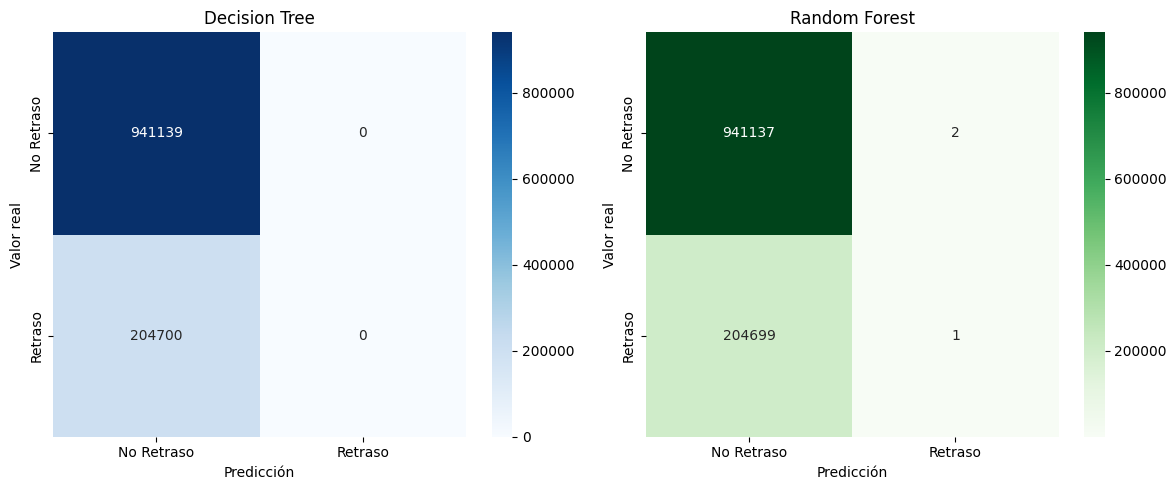

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Retraso', 'Retraso'],
            yticklabels=['No Retraso', 'Retraso'],
            ax=axes[0])
axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor real')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Retraso', 'Retraso'],
            yticklabels=['No Retraso', 'Retraso'],
            ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor real')

plt.tight_layout()
plt.show()
